Task 1

In [125]:
#Use Pandas library to import red wine dataset
import pandas as pd
data=pd.read_csv('winequality-red.csv',sep=';')
data.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [126]:
print(data.columns)
print(data.shape)


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
(1599, 12)


In [127]:
#CLassify the quantity column 
category = ['Class2' if i<=5 else 'Class1' for i in data['quality']]
data['Category'] = category
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Category
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Class2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Class2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Class1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Class2


In [128]:
#Drop qquality column
del data['quality']

In [129]:
data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,Category
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,Class2
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,Class1
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,Class1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,Class2
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,Class1


Split the data into Train,Test and Validation Sets

In [130]:
'''Task 1'''
#finding the inputs and target data
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values
#Split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123,shuffle=True)
X_trn,X_val,y_trn,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=123,shuffle=True)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)
print("X_trn :",X_trn.shape)
print("y_trn :",y_trn.shape)
print("X_val :",X_val.shape)
print("y_val :",y_val.shape)


X_train : (1279, 11)
X_test : (320, 11)
y_train : (1279,)
y_test : (320,)
X_trn : (959, 11)
y_trn : (959,)
X_val : (320, 11)
y_val : (320,)


TASK 2 : PCA Analysis

In [131]:
'''Task 2(a)'''
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit_transform(X_train)
pca = PCA()
proj_wine = pca.fit_transform(scaler)

print("Variance == ",pca.explained_variance_)
print("The variance captured by each Principals components are:\n ",pca.explained_variance_ratio_) 
print("Components == ",pca.components_)

Df= pd.DataFrame(data = proj_wine,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])
print(Df)

Variance ==  [3.12221635 1.91602227 1.57857627 1.19598556 0.9517511  0.65966128
 0.57393515 0.42663951 0.34273439 0.18259929 0.05848602]
The variance captured by each Principals components are:
  [0.28361593 0.17404766 0.14339473 0.10864095 0.08645518 0.05992232
 0.05213513 0.03875508 0.03113331 0.01658696 0.00531275]
Components ==  [[ 0.48588509 -0.23875605  0.46351962  0.14482907  0.21757437 -0.05818174
   0.00482443  0.39639048 -0.43349852  0.25274066 -0.10683689]
 [-0.10368061  0.25493497 -0.13334431  0.27493558  0.14316959  0.5108983
   0.57633953  0.23898833 -0.01117083 -0.05114752 -0.39667376]
 [-0.1354052  -0.45513584  0.23672574  0.08187965 -0.05316613  0.42685159
   0.31222597 -0.33395763  0.066029    0.31887353  0.46009957]
 [-0.2370377   0.09708561 -0.08053376 -0.39947607  0.67797695 -0.05598369
  -0.03741291 -0.15906439 -0.00355997  0.50075638 -0.16751997]
 [-0.10377513  0.22929503 -0.06469573  0.72343032  0.26076001 -0.15875167
  -0.21640498  0.15271262  0.28229671  0.245

Text(0, 0.5, 'The explained variance ratio')

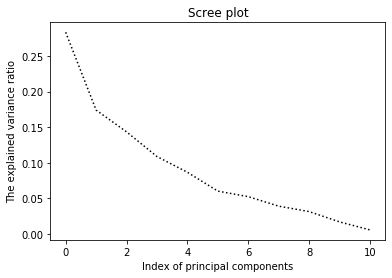

In [132]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(pca.explained_variance_ratio_, color='black', linestyle='dotted')
plt.title("Scree plot")
plt.xlabel("Index of principal components")
plt.ylabel("The explained variance ratio")

In [133]:
finalDf = pd.concat([Df, data[['Category']]], axis = 1)
print(finalDf.head())

   principal component 1  principal component 2  principal component 3  \
0               1.491189              -2.615268               0.571346   
1              -1.058470               0.098520              -0.974077   
2               2.295360              -0.655591              -2.247556   
3              -0.073040              -0.698617              -1.238109   
4              -1.397961               1.506915               0.013612   

   principal component 4  principal component 5  principal component 6  \
0              -0.207641              -0.355156               0.501752   
1               0.476449               0.307314              -0.955955   
2              -1.181734              -0.792419              -0.168087   
3               0.075649              -0.530969              -0.892550   
4              -0.124958              -0.117226              -0.947287   

   principal component 7  principal component 8  principal component 9  \
0               0.219878            

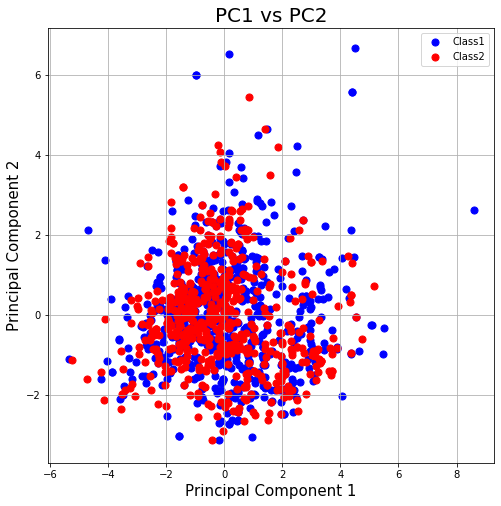

In [134]:
'''Task 2(b)'''
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PC1 vs PC2', fontsize = 20)
targets = ['Class1', 'Class2']
colors = ['b', 'r']
for target, color in zip(targets,colors):
    indices = finalDf['Category'] == target
    ax.scatter(finalDf.loc[indices, 'principal component 1']
               , finalDf.loc[indices, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()


In [135]:
'''Task 2(c)'''
features =range(pca.n_components_)
print("The variance captured by each Principals components are:\n ",pca.explained_variance_ratio_) 


The variance captured by each Principals components are:
  [0.28361593 0.17404766 0.14339473 0.10864095 0.08645518 0.05992232
 0.05213513 0.03875508 0.03113331 0.01658696 0.00531275]


TASK 3 : Do a Classification using the LogisticRegression

In [136]:
'''Task 3(a)'''
#Import LogisticRegression
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

#Initialise LogisticRegression
logis_reg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
#Fit The Data
logis_reg.fit(X_train, y_train)
#Predict The Data
y_prob = logis_reg.predict_proba(X_train)
y_pred = logis_reg.predict(X_train)


In [137]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_train, y_pred))

#show the inputs and predicted outputs
#for i in range(len(X_train)):
    #print("X = %s, Predicted=%s " % (X_train[i],y_pred[i]))


Accuracy: 0.7599687255668491


In [138]:
y_train=pd.DataFrame(y_train,columns=['Actual labels'],dtype=object)
y_train.head()
#print(y_train.iloc[0,0])
Act_list=y_train.values.tolist()
Act_list[5]

['Class1']

In [139]:
y_pred=pd.DataFrame(y_pred,columns=['Prediction Values'],dtype=object)
print(y_pred.head())
print(y_pred.iloc[0,0])
print(y_pred.dtypes)
pred_list=y_pred.values.tolist()
pred_list[0]

  Prediction Values
0            Class1
1            Class2
2            Class2
3            Class2
4            Class2
Class1
Prediction Values    object
dtype: object


['Class1']

In [140]:
cnf_matrix = metrics.confusion_matrix(y_train, y_pred)
cnf_matrix

array([[522, 158],
       [149, 450]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

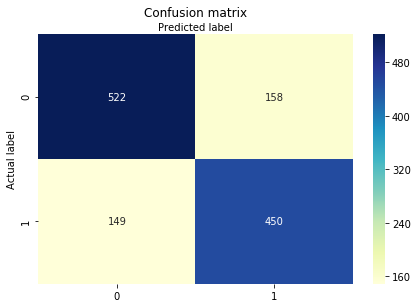

In [141]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [142]:
"TASK 3(b)"
from sklearn.metrics import confusion_matrix
def misPatterns(prediction,labels):
    num1=confusion_matrix(labels, prediction)[0][1]
    num2=confusion_matrix(labels, prediction)[1][0]
    return num1,num2

In [143]:
(num1,num2)=misPatterns(y_pred,y_train)
print('Patterns whose label is 1 but predicted as 2 :',num1)
print('Patterns whose label is 2 but predicted as 1 :',num2)

Patterns whose label is 1 but predicted as 2 : 158
Patterns whose label is 2 but predicted as 1 : 149


In [144]:
"Task 3(c)"
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
#Initialise the Logistic Regression
logis_reg = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
logis_reg.fit(X_train, y_train)
#Predict the data
y_pred_test = logis_reg.predict(X_test)
#Accuracy Rate
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_test))



Accuracy: 0.690625


In [145]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred_test)
cnf_matrix

array([[130,  45],
       [ 54,  91]], dtype=int64)

In [146]:
(num1,num2)=misPatterns(y_pred_test,y_test)
print(num1)
print(num2)

45
54


TASK 4:Investigate  how size of training dataset affects the model performance on test set

In [147]:
"Task 4(a) "
X_trn,X_val,y_trn,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=123,shuffle=True)
print("X_trn :",X_trn.shape)
print("y_trn :",y_trn.shape)
print("X_val :",X_val.shape)
print("y_val :",y_val.shape)


X_trn : (959, 11)
y_trn : (959, 1)
X_val : (320, 11)
y_val : (320, 1)


In [148]:
#Generate different training set sizes
import numpy as np
train_set_sizes=np.arange(0.6,0.95,0.05)
print(train_set_sizes)

[0.6  0.65 0.7  0.75 0.8  0.85 0.9 ]


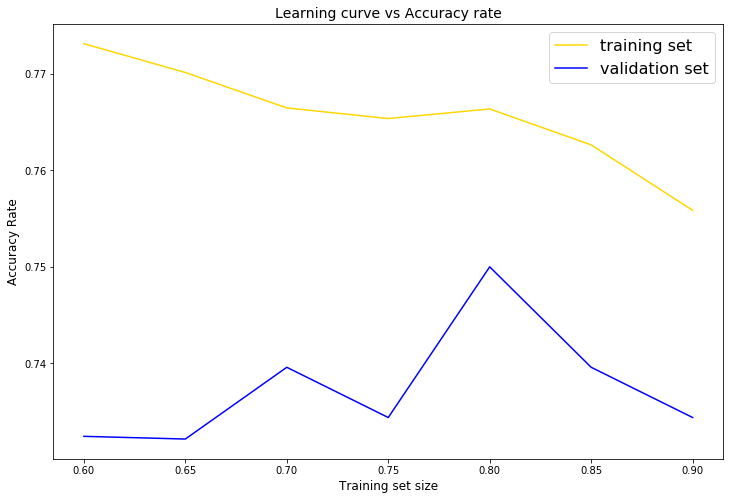

In [149]:
 #Learning Curve
training_score =[]
validation_score=[]
for i in train_set_sizes:
    X_trn,X_val,y_trn,y_val = train_test_split(X_train,y_train,train_size=i,random_state=123)
    lr = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
    lr.fit(X_trn, y_trn)
    training_accuracy = metrics.accuracy_score(y_trn,lr.predict(X_trn))
    Validation_accuracy =metrics.accuracy_score(y_val,lr.predict(X_val))
    training_score.append(training_accuracy)
    validation_score.append(Validation_accuracy)
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(train_set_sizes,training_score,c='gold')
ax.plot(train_set_sizes,validation_score,c='blue')
ax.set_title('Learning curve vs Accuracy rate',size=14)
ax.set_xlabel("Training set size",size=12)
ax.set_ylabel("Accuracy Rate",size=12)
ax.legend(['training set','validation set'],fontsize=16)


In [150]:
from sklearn.model_selection import cross_val_score
val=np.mean(cross_val_score(lr, X_trn, y_trn, cv=10))*100
print(val)

75.15364686078014


"Task 4(b)
From the above analysis it can be conclude that Training set size must be 60% of the total dataset as because the accuracy is much higher with that particular training data set size.

In [151]:
"Task 4(c)"
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.60, random_state=123)
print("X_train :",X_train.shape)
print("X_test :",X_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)


X_train : (959, 11)
X_test : (640, 11)
y_train : (959,)
y_test : (640,)


In [152]:

X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
l_r = LogisticRegression(solver = 'lbfgs',multi_class='multinomial')
l_r.fit(X_train, y_train)
lr_predict = l_r.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print(lr_conf_matrix)
print(f" Accuracy: {round(lr_acc_score*100,2)}%")

[[253  74]
 [104 209]]
 Accuracy: 72.19%


TASK 5 : Investigate how number of features extracted from PCA affetcts the model performance on test set

In [153]:
'''Task 5(a)'''
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val=train_test_split(X_train,y_train ,test_size=0.25, random_state=0)

In [154]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

(959, 11)
(959,)
(320, 11)
(320,)


In [155]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
sc=StandardScaler()
scaled=sc.fit_transform(X_train)
pca = PCA()
x_pca = pca.fit_transform(X_train)

proj=pd.DataFrame(data=x_pca,columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5', 'principal component 6', 'principal component 7', 'principal component 8', 'principal component 9', 'principal component 10', 'principal component 11'])
print(proj.head())

   principal component 1  principal component 2  principal component 3  \
0               1.616745               0.119922               2.947519   
1               0.202204              -0.033526               2.055035   
2              -0.398951              -1.299920               1.246098   
3               0.614728               0.882101               0.898901   
4               3.750458              -0.945738              -0.429667   

   principal component 4  principal component 5  principal component 6  \
0              -0.771145              -1.674852               1.706758   
1               1.617162               0.325188              -1.512800   
2               0.147338              -0.337118               0.109994   
3              -0.168138              -0.843443              -0.694105   
4               0.624956              -0.329728              -1.973145   

   principal component 7  principal component 8  principal component 9  \
0              -0.013308            

In [156]:
'''Task 5(b)'''
principalComponents=[1,2,3,4,5,6,7,8,9,10]
trn=[]
vl=[]

In [157]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
for i in principalComponents:
    pca = PCA(n_components = i) 
    X_train1 = pca.fit_transform(X_train) 
    X_val1 = pca.transform(X_val) 
    lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
    lr.fit(X_train1, y_train)
    val=np.mean(cross_val_score(lr, X_train1, y_train, cv=10))*100
    vl.append(val)
    lr_predict = lr.predict(X_val1)
    lr_acc_score = accuracy_score(y_val, lr_predict)
    trn.append(round(lr_acc_score*100,2))


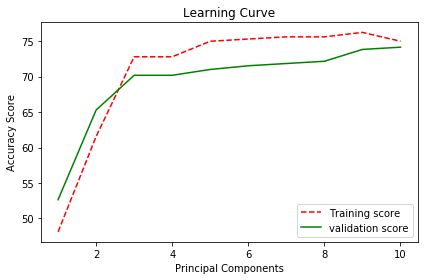

In [158]:
plt.plot(principalComponents,trn , '--', color="r",  label="Training score")
plt.plot(principalComponents,vl , '-' ,color="g", label="validation score")
plt.title("Learning Curve")
plt.xlabel("Principal Components")
plt.ylabel("Accuracy Score")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

'''Task 5(c)'''
From the above analysis,I concluded that the best PCA component is 9 because it has highest accuracy rate

In [159]:
'''Task 5(d)'''
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)
pca = PCA(n_components = 9) 
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
lr = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_acc_score = accuracy_score(y_test, lr_predict)


In [160]:
lr_acc_score = accuracy_score(y_test, lr_predict)
print(f" Accuracy: {round(lr_acc_score*100,2)}%")

 Accuracy: 54.37%
